In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

BASE_PATH = '/home/guillermo/Documents/SINC/RNA/analysis/AEseq2seq/'
DATA_PATH = 'notebooks/from_db/Unet/v3/'

In [2]:
sns.set_theme(style="whitegrid", palette="pastel")

In [3]:
data_conv = pd.read_csv(BASE_PATH + DATA_PATH + 'convolutional_layers/params_best_epoch.csv')
metrics_conv = pd.read_csv(BASE_PATH + DATA_PATH + 'convolutional_layers/train_metrics.csv')

In [4]:
data_pool = pd.read_csv(BASE_PATH + DATA_PATH + 'pooling_layers/params_best_epoch.csv')
metrics_pool = pd.read_csv(BASE_PATH + DATA_PATH + 'pooling_layers//train_metrics.csv')

In [46]:
# Asumiendo que `data_pool['name']` tiene las listas que compartiste
data_pool['name'] = data_pool['name'].apply(lambda x: x[x.index('num_convs'):])

data_conv['name'] = data_conv['name'].apply(lambda x: x[x.index('num_convs'):])

In [47]:
data_c_skips = data_conv[data_conv['arc_skip_conn'] == 1]
data_pool_skips = data_pool[data_pool['arc_skip_conn'] == 1]
data_c_no_skips = data_conv[data_conv['arc_skip_conn'] == 0]
data_pool_no_skips = data_pool[data_pool['arc_skip_conn'] == 0]

In [48]:
data_conv.columns

Index(['run_uuid', 'name', 'best_epoch', 'arc_filters', 'arc_rank',
       'arc_kernel', 'arc_stride_1', 'arc_stride_2', 'arc_num_conv1',
       'arc_num_conv2', 'arc_latent_dim', 'arc_skip_conn', 'hyp_lr',
       'hyp_output_th', 'hyp_scheduler', 'best_epoch.1', 'train_loss',
       'train_Accuracy', 'train_Accuracy_seq', 'train_F1', 'valid_loss',
       'valid_Accuracy', 'valid_Accuracy_seq', 'valid_F1', 'test_loss',
       'test_Accuracy', 'test_Accuracy_seq', 'test_F1'],
      dtype='object')

In [49]:
data_conv[['name', 'arc_filters', 'arc_rank', 'arc_latent_dim', 'arc_num_conv1','arc_num_conv2', 'arc_skip_conn', 'best_epoch','train_Accuracy', 'valid_Accuracy', 'test_Accuracy']].sort_values(['valid_Accuracy', 'arc_filters','arc_rank', 'arc_latent_dim','arc_skip_conn'])

,name,arc_filters,arc_rank,arc_latent_dim,arc_num_conv1,arc_num_conv2,arc_skip_conn,best_epoch,train_Accuracy,valid_Accuracy,test_Accuracy
7,num_convs-1-2-ld-4,8,32,4,1,2,0,19,0.829167,0.820741,0.820658
9,num_convs-1-2-ld-8,8,32,8,1,2,0,17,0.842555,0.824737,0.830954
17,num_convs-2-1-ld-4,16,32,4,2,1,0,19,0.852745,0.828015,0.837865
4,num_convs-1-1-ld-8,8,16,8,1,1,0,19,0.847037,0.828743,0.835963
2,num_convs-1-1-ld-4,8,16,4,1,1,0,19,0.846862,0.830616,0.837983
12,num_convs-1-3-ld-4,8,64,4,1,3,0,18,0.856250,0.832211,0.843262
0,num_convs-1-1-ld-16,8,16,16,1,1,0,16,0.857833,0.833337,0.835542
5,num_convs-1-2-ld-16,8,32,16,1,2,0,18,0.867829,0.837791,0.840189
22,num_convs-2-2-ld-4,16,64,4,2,2,0,19,0.873254,0.841139,0.847227
14,num_convs-1-3-ld-8,8,64,8,1,3,0,19,0.874272,0.841438,0.846065


In [50]:
data_pool[['name', 'arc_filters', 'arc_rank', 'arc_latent_dim', 'arc_num_conv1','arc_num_conv2', 'arc_skip_conn', 'best_epoch','train_Accuracy', 'valid_Accuracy', 'test_Accuracy']].sort_values(['arc_rank', 'arc_latent_dim','arc_skip_conn']).query('best_epoch >2')

,name,arc_filters,arc_rank,arc_latent_dim,arc_num_conv1,arc_num_conv2,arc_skip_conn,best_epoch,train_Accuracy,valid_Accuracy,test_Accuracy
2,num_convs-1-1-ld-4,8,16,4,1,1,0,12,0.814037,0.815260,0.812029
32,num_convs-1-1-ld-4,8,16,4,1,1,1,19,0.999928,0.999950,0.999949
4,num_convs-1-1-ld-8,8,16,8,1,1,0,16,0.821305,0.818280,0.817459
34,num_convs-1-1-ld-8,8,16,8,1,1,1,19,0.999798,0.999940,0.999899
0,num_convs-1-1-ld-16,8,16,16,1,1,0,19,0.840837,0.827517,0.822383
30,num_convs-1-1-ld-16,8,16,16,1,1,1,19,0.999916,0.999940,0.999832
1,num_convs-1-1-ld-32,8,16,32,1,1,0,18,0.845691,0.828693,0.828378
31,num_convs-1-1-ld-32,8,16,32,1,1,1,19,0.999935,0.999970,0.999983
3,num_convs-1-1-ld-64,8,16,64,1,1,0,18,0.856503,0.831643,0.831467
33,num_convs-1-1-ld-64,8,16,64,1,1,1,18,0.974624,0.975606,0.973018


## REVISAR DATOS ARRIBA

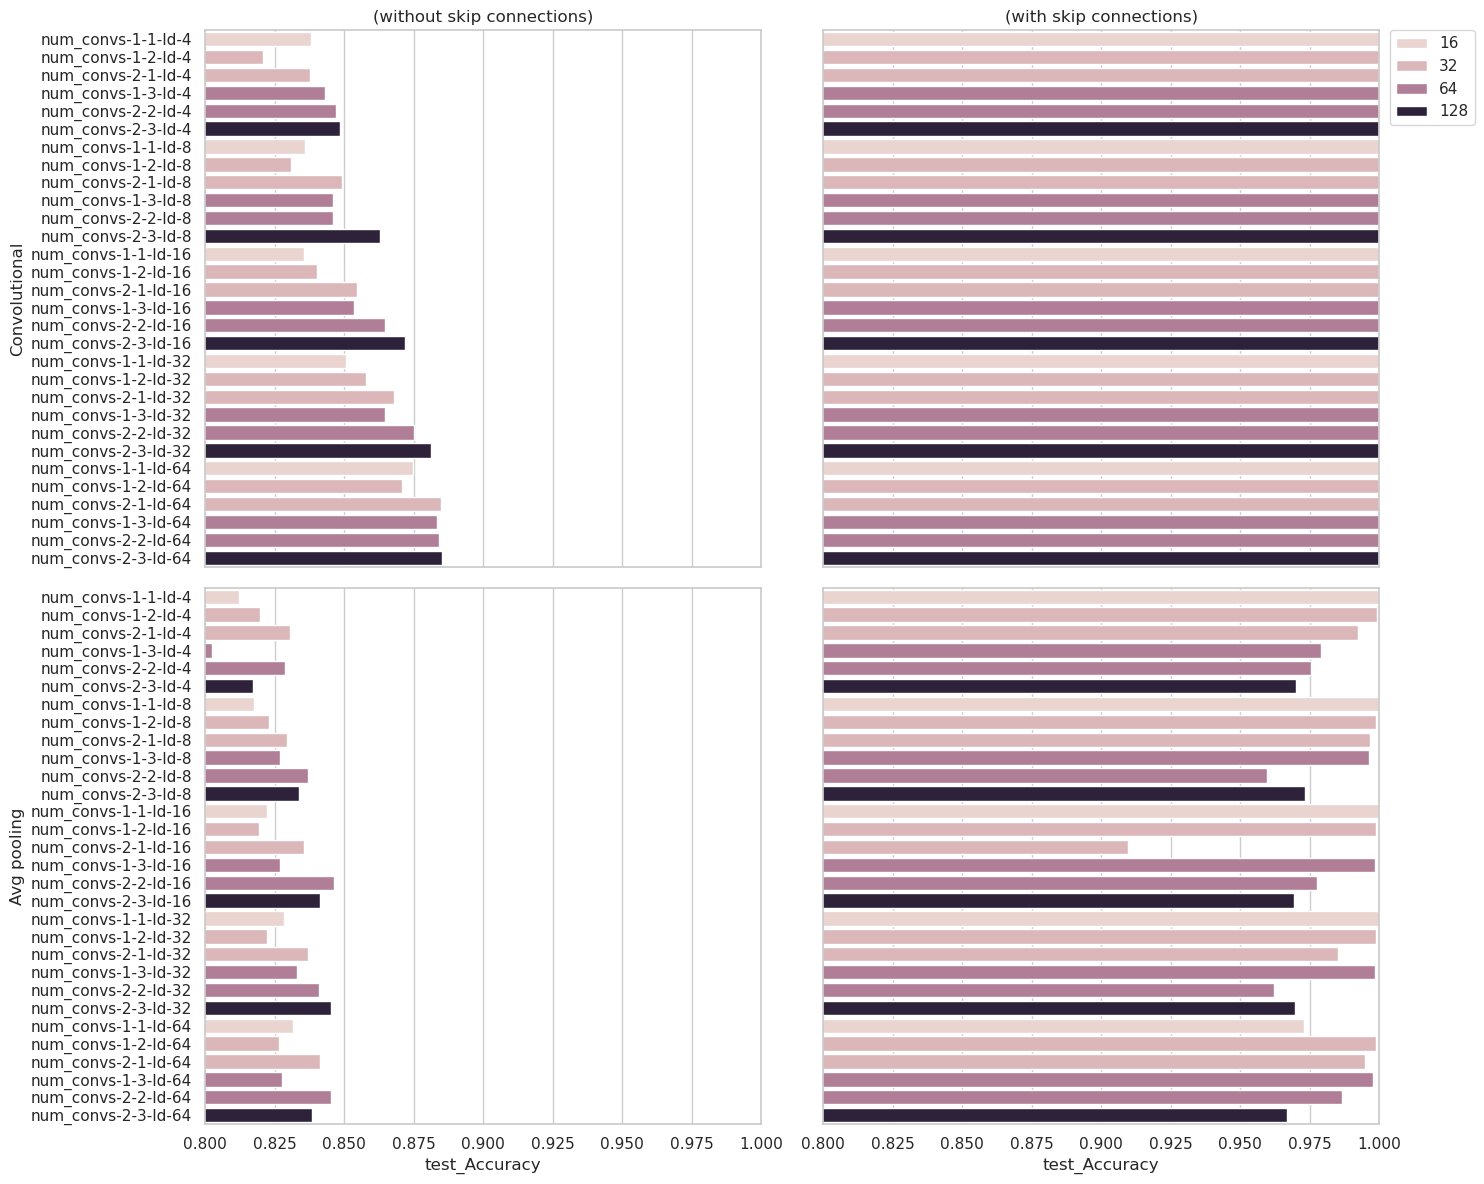

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharex=True)

order = [ 'arc_latent_dim', 'arc_rank']
# order = ['arc_filters','arc_rank']
hue = 'arc_rank'

g = sns.barplot(data=data_c_no_skips.sort_values(by=order), x='test_Accuracy', y='name', hue=hue,legend=False,  ax=axes[0, 0])
g.set_title('(without skip connections)') 
g.set_xlim([0.8, 1])

g.set(ylabel='Convolutional')

g = sns.barplot(data=data_c_skips.sort_values(by=order), x='test_Accuracy', y='name', hue=hue, ax=axes[0, 1])
g.set_title('(with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])
g.set_yticklabels([])
g.set(ylabel='')


g = sns.barplot(data=data_pool_no_skips.sort_values(by=order), x='test_Accuracy', y='name', hue=hue, legend=False, ax=axes[1, 0])
g.set_xlim([0.8, 1])
g.set(ylabel='Avg pooling')

g = sns.barplot(data=data_pool_skips.sort_values(by=order), x='test_Accuracy', y='name', hue=hue, legend=False,  ax=axes[1, 1])
g.set_yticklabels([])
g.set(ylabel='')

g.set_xlim([0.8, 1])
fig.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


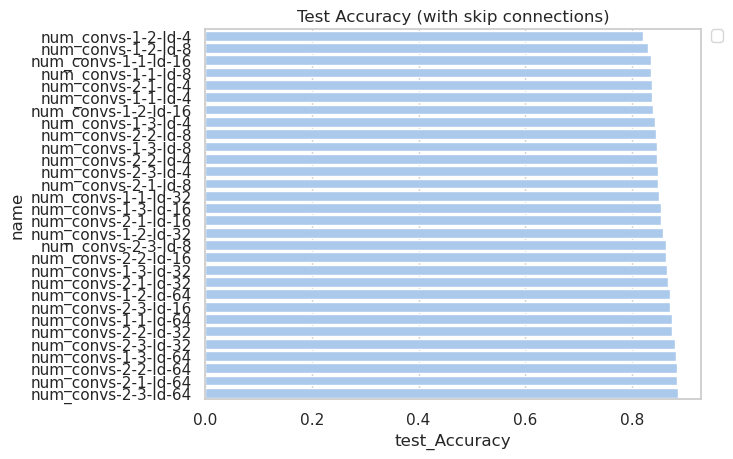

In [52]:
g = sns.barplot(data=data_c_no_skips.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name')
g.set_title('Test Accuracy (with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [54]:
cols = ['run_uuid', 'arc_filters', 'arc_rank', 'arc_latent_dim', 'arc_num_conv1','arc_num_conv2', 'arc_skip_conn']
metrics_skips = pd.merge(metrics_conv, data_c_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')
metrics_no_skips = pd.merge(metrics_conv, data_c_no_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')

Text(0.5, 1.0, 'without skip connections')

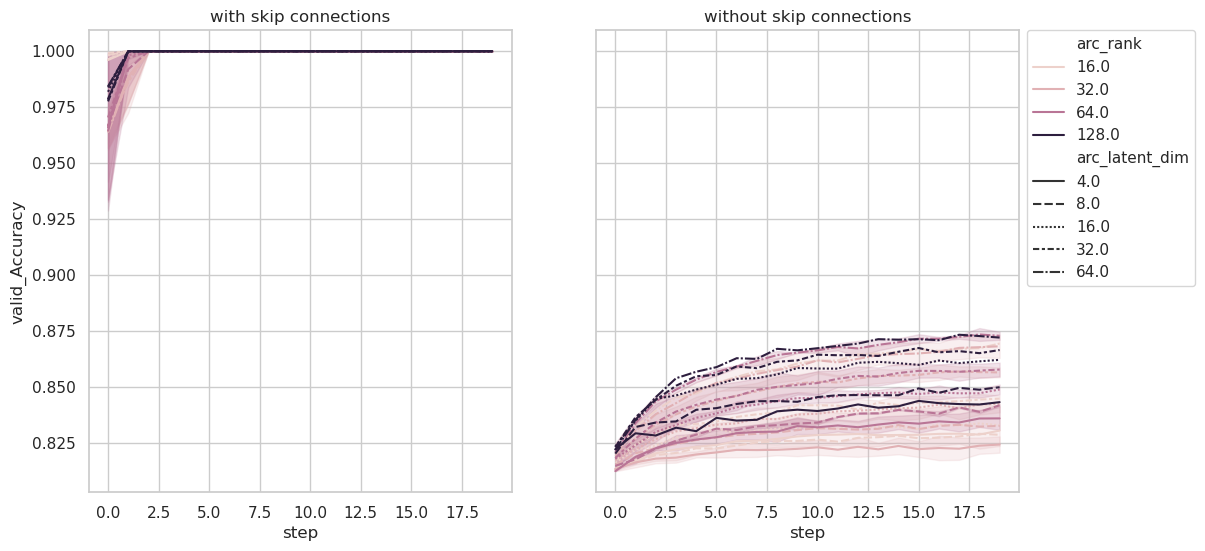

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_skips, x='step', y='valid_Accuracy', style='arc_latent_dim', hue='arc_rank', ax=ax[0], legend=False)
# g.grid()
g.set_title('with skip connections')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy', style='arc_latent_dim', hue='arc_rank', ax=ax[1])
f.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# f.grid()
f.set_title('without skip connections')

Text(0.5, 1.0, 'filters')

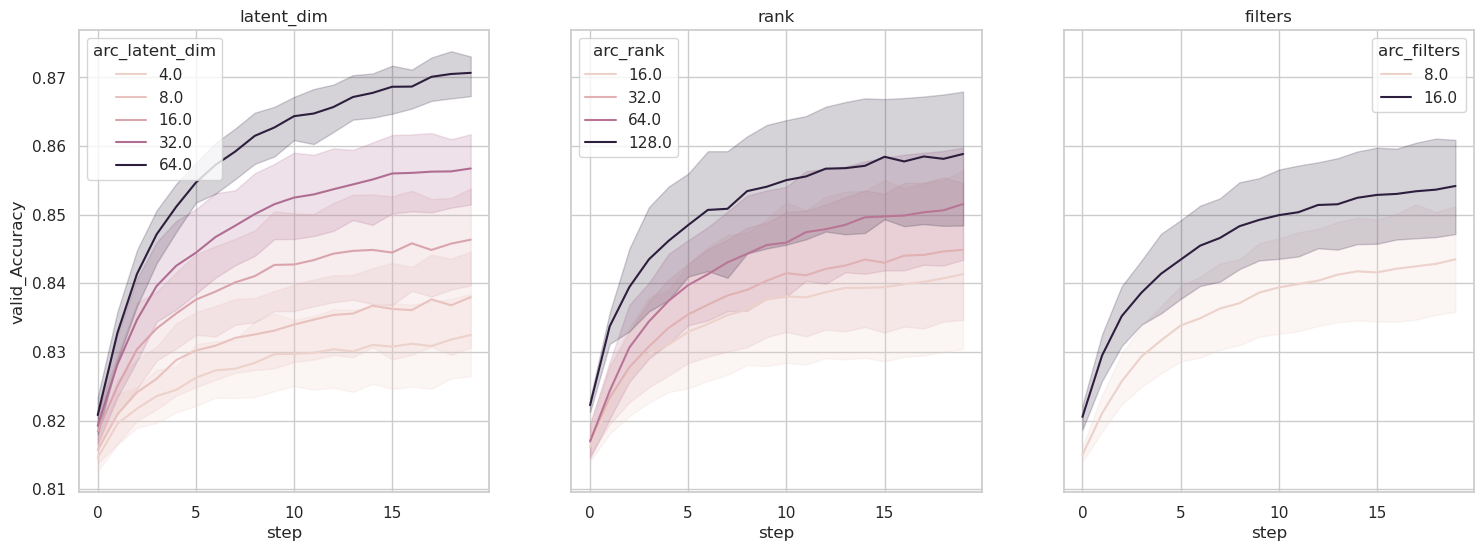

In [58]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy',   hue='arc_latent_dim', ax=ax[0] )
# g.grid()
g.set_title('latent_dim')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy',   hue='arc_rank', ax=ax[1])
f.set_title('rank')


f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy',   hue='arc_filters', ax=ax[2])
f.set_title('filters')
# f.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# f.grid()

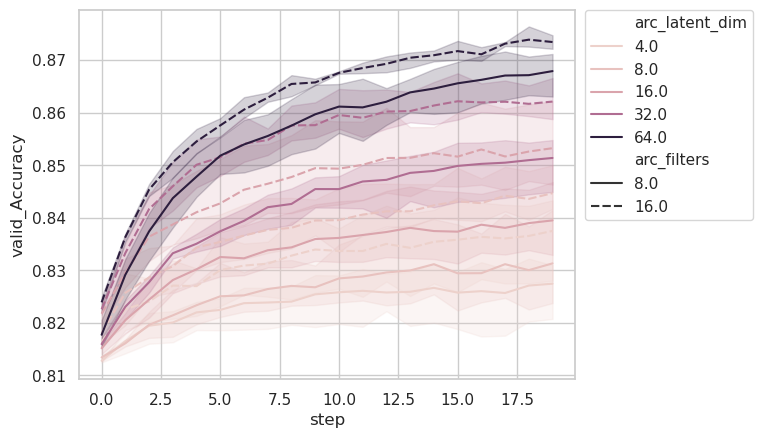

In [61]:

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy', style='arc_filters', hue='arc_latent_dim')
f.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)